<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/ex06_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98%2C_%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98%2C_%EC%98%A4%EC%B0%A8%EC%97%AD%EC%A0%84%ED%8C%8C%2C_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망으로 딥러닝 학습을 하는 기본적인 원리
- 활성화 함수
- 손실 함수
- 오차역전파
- 경사하강법

# 활성화 함수
- 이전 퍼셉트론에 다음 퍼셉트론으로 값을 전달할 때 비선형적으로 전달하기 위한것
  - 생물학적 동작을 모델링하기 위한것
  - 실험적 특성에 따른 설계

- 종류
  - 계단함수 : 항상 상수이므로 미분하면 0이 되어 학습에 사용할 수 없음
  - Sigmoid
  - tanh
  - ReLU

- sigmoid 함수
  - 0부터 1까지 S곡선 함수
  - 공식
  
  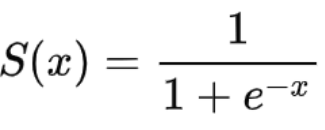

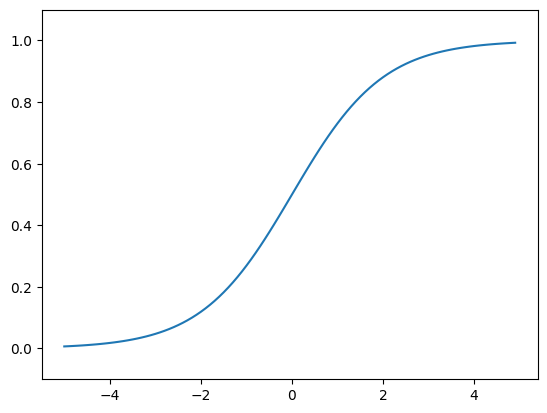

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_f(x) :
  return 1 / (1 + np.exp(-x))

# sigmoid 함수 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid_f(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- sigmoid 미분하기

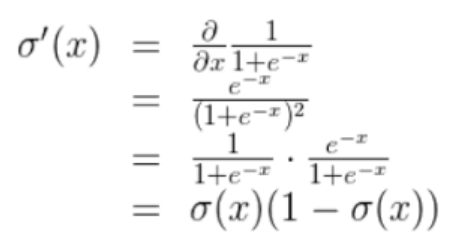

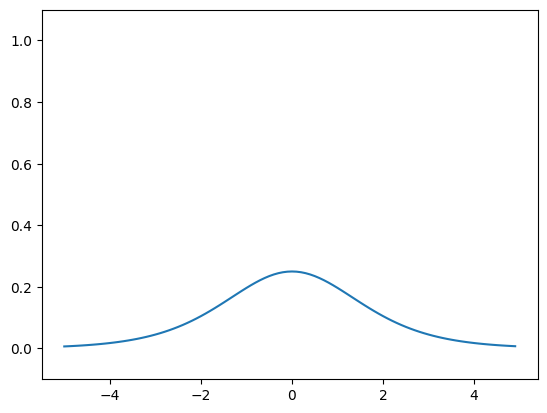

0.25

In [ ]:
# sigmoid 미분
def sigmoid_d(x) :
  return sigmoid_f(x) * (1-sigmoid_f(x))

# sigmoid 미분함수 그리기
y = sigmoid_d(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

y.max()

- tanh 함수

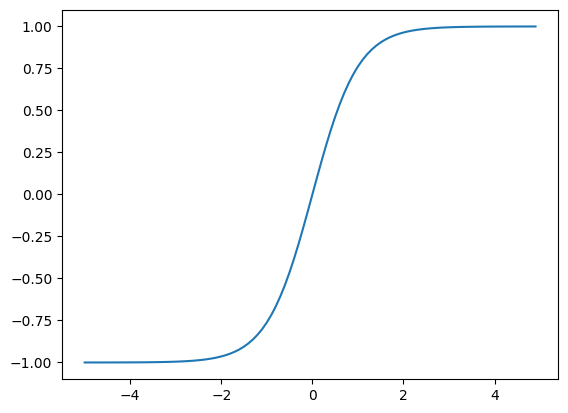

In [ ]:
y = np.tanh(x)

plt.plot(x, y)
plt.show()

- tanh 미분

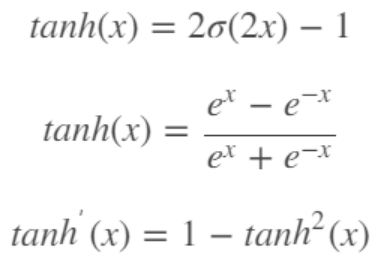

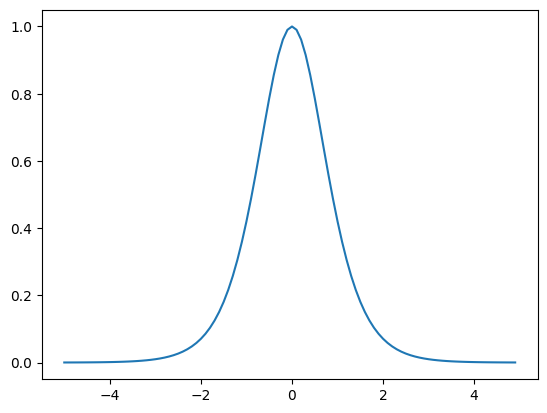

1.0

In [ ]:
# tanh 미분
def tanh_d(x) :
  return (1 - np.tanh(x)) * (1 + np.tanh(x))

y = tanh_d(x)

plt.plot(x, y)
plt.show()

y.max()

- ReLU
  - 0보다 작으면 0이고, 0보다 크면 x값이 할당

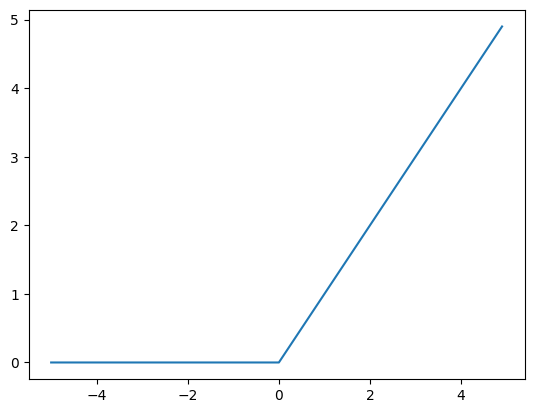

In [ ]:
def relu_f(x) :
  return np.maximum(0, x) # 0과 x 중 큰 값 반환 → x가 0보다 작으면 0, 크면 x 반환

y = relu_f(x)

plt.plot(x, y)
plt.show()

- softmax
  - 출력층에 사용하는 활성화 함수 : linear (회귀), sigmoid (이진), softmax (onehot인코딩 된 분류)
  - linear는 생략 가능 (항등함수)
  - 공식

  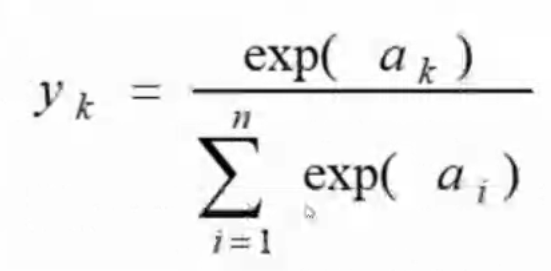

  - 공식의 의미
    - 전체 출력의 합에서 자신의 출력의 비(확률)
    - softmax 출력의 합은 1

In [ ]:
# softmax 구현
def softmax_f(x) :
  exp_x = np.exp(x - np.max(x)) # 분자 - 지수 부분이 큰 값이면 값이 무한대로 커지는 현상을 방지하기 위해 최대값을 빼준다.
  sum_exp_x = np.sum(exp_x) # 분모

  return exp_x / sum_exp_x

x = np.array([1000, 900, 800])
print(softmax_f(x))

[1.00000000e+00 3.72007598e-44 1.38389653e-87]


# 손실함수
- 오차 : 실제값과 예측값의 차이

- 신경망의 성능을 평가할 때는 오차의 합이 최소값인 것을 가장 좋은 모델로 선정

  - 모델 1의 오차 : 10, -10, 1 → 오차의 합 : 1
  - 모델 2의 오차 : 2, 0, 3 → 오차의 합 : 5
  - 모델 1 > 모델 2 ???

- 음수의 오차를 제거하는 방법이 필요!
  - 평균 절대값 오차 : MAE (Mean Absolute Error)
  - 평균 제곱 오차 : MSE (Mean Squared Error)

- 주로 MSE를 사용 → 좋은 모델과 잘못된 모델을 확실하게 구분

- RMSE : MSE의 제곱된 오차를 원래대로 복원 (실제 서비스에서는 제대로 된 오차 필요)

- MSE 문제점
  - 삼성 주식 = 100만원 → MSE : 10만원
  - 네이버 주식 = 10만원 → MSE : 5만원
  - 삼성 주식 예측 < 네이버 주식 예측 ???
  - 모델간 비교에는 부적합한 부분이 있음

- R2 Score
  - MSE와 표준편차의 비를 구한 것
    - 삼성 주식 예측 모델 : 10/100 = 0.1
    - 네이버 주식 예측 모델 : 5/10 = 0.5

- 공식

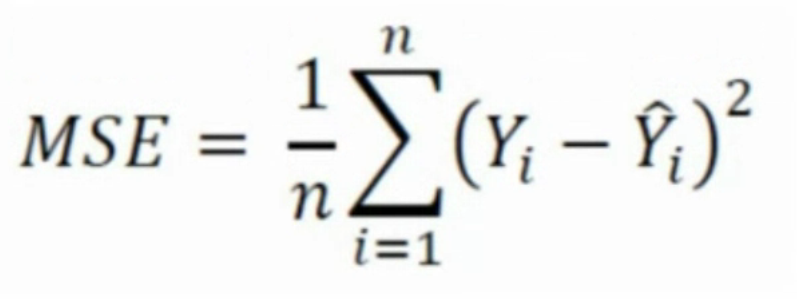

In [ ]:
# y : 예측값, t : 실제값, n : 데이터 갯수
def mse_f(y, t, n) :
  return 1/n * np.sum((y-t)**2)

t = np.array([0,   0,    1,   0,   0,   0,    0,    0,    0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.1, 0.01, 0.03, 0.01, 0.02])

print(mse_f(t, y, t.size))

0.02044444444444445


In [ ]:
# 성능이 떨어지는 모델 평가

t = np.array([0,   0,    1,   0,    0,   0,    0,   0,   0])
y = np.array([0.3, 0.15, 0.1, 0.02, 0.1, 0.01, 0.6, 0.1, 0.02])

print(mse_f(t, y, t.size))

0.1448222222222222


- 교차 엔트로피 오차 (CEE : Cross Entropy Error)
  - MSE는 틀린 것(오차)에 더 집중하는 성향
  - 분류는 틀린 것과 맞은 것을 같은 비중을 두고 판단해야 함
  - MSE + softmax를 미분하면 y * (1-y) 형태가 나옴 → y가 0이나 1이 되면 오차가 0이 되는 문제 → 학습이 안됨
  - CEE를 사용
  - 공식

  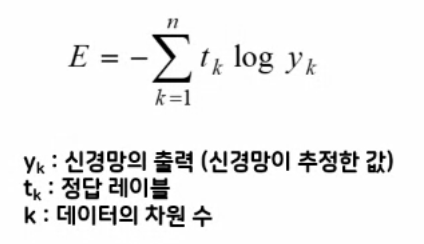

In [ ]:
def cee_f(y, t, n) :
  return -np.sum(t * np.log(y + 1e-7)) # y가 0이면 log(y)는 무한대가 되기 때문에 아주 작은 값을 더해서 0이 되지 않게 해야함!

t = np.array([0,   0,    1,   0,   0,   0,    0,    0,    0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.1, 0.01, 0.03, 0.01, 0.02])

print(cee_f(y, t, t.size))

0.510825457099338


In [ ]:
# 성능이 떨어지는 모델 평가

t = np.array([0,   0,    1,   0,    0,   0,    0,   0,   0])
y = np.array([0.3, 0.15, 0.1, 0.02, 0.1, 0.01, 0.6, 0.1, 0.02])

print(cee_f(y, t, t.size))

2.302584092994546


# 오차 역전파 구현해보기

- ① 가중치 초기화(w, b) → 랜덤
- ② 특성 데이터를 입력해서 예측값을 계산
  - pred_y = w * x + b
- ③ 오차 계산
  - e = y - pred_y
- ④ 미분 (오차와 가중치의 비)
  - dw = e / w
  - db = e / b
- ⑤ 미분한 값에 학습률을 곱하기 (급격한 변화 방지) (실제로는 활성화 함수의 미분도 곱해짐)
  - dw = dw * lr
  - db = db * lr
- ⑥ 가중치에 경사값을 더하기 (가중치 업데이트)
  - w = w + dw
  - b = b + db
- ② ~ ⑥까지를 epoch만큼 반복

- 퍼셉트론 1개로 구현

In [ ]:
# fit 함수 만들어보기

import numpy as np

def fit_user(X, y, epoch, lr) : # 특성값, 라벨, 반복수, 학습률
  # ① 가중치 초기화 → 랜덤
  w = np.random.randn(1) # randn(1) : 평균 = 0, 분산 = 1인 정규분포에서 랜덤 값을 '1개' 추출
  b = np.random.randn(1)

  print(f"초기 가중치 값 : w = {w} , b = {b}")

  # ② ~ ⑥까지 epoch만큼 반복

  for i in range(epoch) :
    # ② 예측값 계산
    pred_y = w*X + b

    # ③ 오차 계산
    e = y - pred_y

    # ④ 미분 (경사 계산)
    dw = e / w
    db = e / b

    # ⑤ 학습률 적용 (w가 너무 크게 변하는 것 방지)
    dw = dw * lr
    db = db * lr

    # ⑥ 가중치 업데이트
    w = w + dw
    b = b + db

    # 중간 결과 출력
    print(f"반복수 : {i+1} ,  예측값 : {pred_y}, 오차 : {e}" , end = " ")
    print(f"현재 가중치 : w = {w} , b = {b}")


fit_user(2, 1, 100, 0.01)

초기 가중치 값 : w = [0.02983207] , b = [0.03717041]
반복수 : 1 ,  예측값 : [0.09683454], 오차 : [0.90316546] 현재 가중치 : w = [0.33258196] , b = [0.28015011]
반복수 : 2 ,  예측값 : [0.94531402], 오차 : [0.05468598] 현재 가중치 : w = [0.33422624] , b = [0.28210213]
반복수 : 3 ,  예측값 : [0.95055461], 오차 : [0.04944539] 현재 가중치 : w = [0.33570564] , b = [0.28385488]
반복수 : 4 ,  예측값 : [0.95526616], 오차 : [0.04473384] 현재 가중치 : w = [0.33703817] , b = [0.28543082]
반복수 : 5 ,  예측값 : [0.95950716], 오차 : [0.04049284] 현재 가중치 : w = [0.3382396] , b = [0.28684948]
반복수 : 6 ,  예측값 : [0.96332868], 오차 : [0.03667132] 현재 가중치 : w = [0.33932379] , b = [0.28812789]
반복수 : 7 ,  예측값 : [0.96677546], 오차 : [0.03322454] 현재 가중치 : w = [0.34030292] , b = [0.28928101]
반복수 : 8 ,  예측값 : [0.96988686], 오차 : [0.03011314] 현재 가중치 : w = [0.34118782] , b = [0.29032198]
반복수 : 9 ,  예측값 : [0.97269761], 오차 : [0.02730239] 현재 가중치 : w = [0.34198803] , b = [0.29126239]
반복수 : 10 ,  예측값 : [0.97523846], 오차 : [0.02476154] 현재 가중치 : w = [0.34271208] , b = [0.29211254]
반복수 : 11 ,  예

- 퍼셉트론 2개로 구현

In [ ]:
import numpy as np

def fit_user2(X, y, epoch, lr) : # 특성값, 라벨, 반복수, 학습률
  # ① 가중치 초기화 → 랜덤
  w1 = np.random.randn(1) # randn(1) : 평균 = 0, 분산 = 1인 정규분포에서 랜덤 값을 '1개' 추출
  b1 = np.random.randn(1)
  w2 = np.random.randn(1)
  b2 = np.random.randn(1)

  print(f"초기 가중치 값 : w1 = {w1} , w2 = {w2} b1 = {b1}, b2 = {b2}")

  # ② ~ ⑥까지 epoch만큼 반복

  for i in range(epoch) :
    # ② 예측값 계산
    pred_y1 = w1*X + b1
    pred_y2 = w2 * pred_y1 + b2

    # ③ 오차 계산
    e = y - pred_y2

    # print(f"반복수 : {i+1} ,  예측값 : {pred_y2}, 오차 : {e}")

    # ④ 오차역전파(미분 (경사 계산))
    # 2층 미분
    dw2 = e / w2
    db2 = e / b2

    # 2층의 파라미터 갱신
    w2 = w2 + (dw2 * lr)
    b2 = b2 + (db2 * lr)

    # 1층 미분
    dw1 = pred_y1 * dw2 / w1 # pred_y1 * dw2 : 2층으로부터 전달된 1층의 오차
    db1 = pred_y1 * db2 / b1 # 2층의 오차만큼 1층에서도 발생할것이라 생각

    # 1층의 파라미터 갱신
    w1 = w1 + (dw1 * lr)
    b1 = b1 + (db1 * lr)

    # 중간 결과 출력
    print(f"반복수 : {i+1} ,  예측값 : {pred_y2}, 오차 : {e}" , end = " ")
    print(f"현재 가중치 : w1 = {w1} , b1 = {b1}, w2 = {w2} , b2 = {b2}")

fit_user2(2, 1, 50, 0.01)

초기 가중치 값 : w1 = [-0.05354438] , w2 = [0.18507921] b1 = [-1.19844088], b2 = [-0.70526713]
반복수 : 1 ,  예측값 : [-0.94689352], 오차 : [1.94689352] 현재 가중치 : w1 = [2.51127852] , b1 = [-1.22851263], w2 = [0.29027166] , b2 = [-0.73287218]
반복수 : 2 ,  예측값 : [0.36843138], 오차 : [0.63156862] 현재 가중치 : w1 = [2.54415031] , b1 = [-1.20189833], w2 = [0.3120295] , b2 = [-0.7414899]
반복수 : 3 ,  예측값 : [0.47118229], 오차 : [0.52881771] 현재 가중치 : w1 = [2.57003931] , b1 = [-1.17883719], w2 = [0.32897719] , b2 = [-0.74862172]
반복수 : 4 ,  예측값 : [0.55453635], 오차 : [0.44546365] 현재 가중치 : w1 = [2.59091006] , b1 = [-1.15884191], w2 = [0.34251806] , b2 = [-0.75457217]
반복수 : 5 ,  예측값 : [0.6233705], 오차 : [0.3766295] 현재 가중치 : w1 = [2.60798371] , b1 = [-1.14151437], w2 = [0.35351396] , b2 = [-0.75956347]
반복수 : 6 ,  예측값 : [0.68081255], 오차 : [0.31918745] 현재 가중치 : w1 = [2.6220897] , b1 = [-1.12651511], w2 = [0.36254295] , b2 = [-0.76376572]
반복수 : 7 ,  예측값 : [0.72906443], 오차 : [0.27093557] 현재 가중치 : w1 = [2.63382543] , b1 = [-1.113548

# 경사하강법